# Exercise 2 - k_NN : Regression

In [30]:
import numpy as np
import matplotlib.pyplot as plt

Load the data from the CSV file

In [31]:
data = np.loadtxt('polynomial200.csv', delimiter=',', dtype='float64', usecols=(0,1))

## Question 1
Divide the data into 2 different sets of size 100 each. First set is the train set and second set is the test set.
What is did was that 1 of every 2 values goes for the training set and the other goes for the testing set.

In [32]:
X_train = data[:100]
X_test = data[100:]
print(X_train.shape)
print(X_test.shape)

(100, 2)
(100, 2)


## Question 2 
Here, we plot the two sets

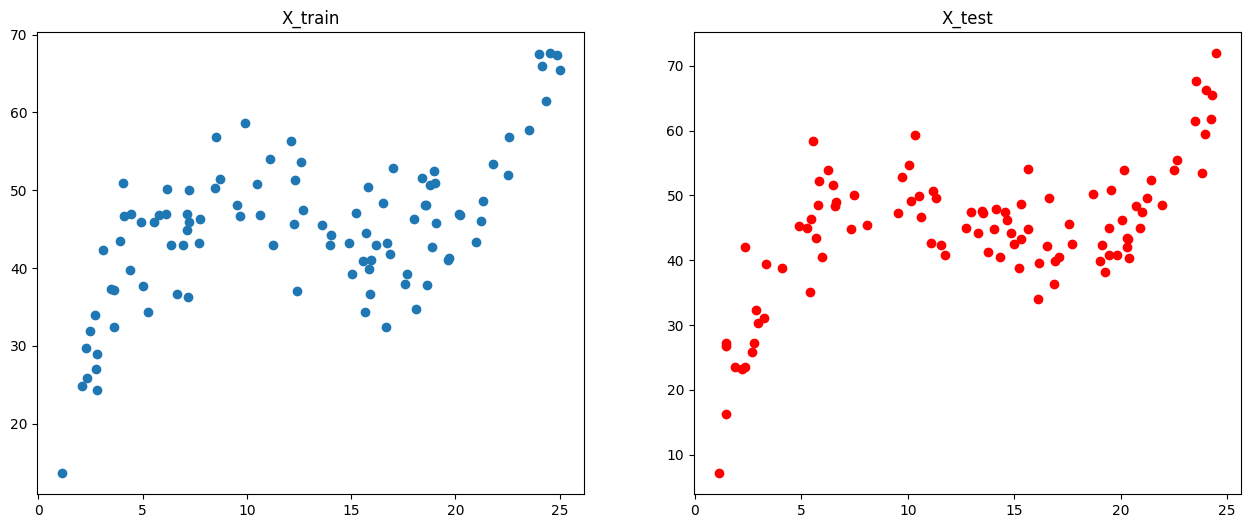

In [33]:
grid_shape = (1, 2)
plt.figure(figsize=(24,6))
plt.subplot(131)
plt.scatter(X_train[:,0], X_train[:,1] )
title = 'X_train'
plt.title(title)
plt.subplot(132)
plt.scatter(X_test[:,0], X_test[:,1], c='r')
title = 'X_test'
plt.title(title)
plt.show()

Initialize all the values of k

In [34]:
ks = np.array([1,3,5,7,9,11])

We create the function "prediction" which bascially executes the pseudo code in the course: 
3. Find the k nearest neighbors to z
3.1 Calculate the distance between point z and each row in the training data.
3.2 Sort the calculated distances in ascending order based on distance values
3.3 Get top k rows from the sorted list
3.4 Return the mean value of the labels of these rows

In [35]:
def prediction(point, k, X_concerned):
    distance = np.array([np.sqrt(np.square(x[0] - point[0])) for x in X_concerned])
    k_indices = np.argsort(distance)[:k]
    k_nearest_labels = np.array([X_concerned[i] for i in k_indices])
    # Compute the average of x and the average of y and return it
    x_mean = np.mean([k_nearest_labels[:,0]])
    y_mean = np.mean([k_nearest_labels[:,1]])
    return np.array([x_mean, y_mean])    

## Question 3
Here we show the different plot according to the different k

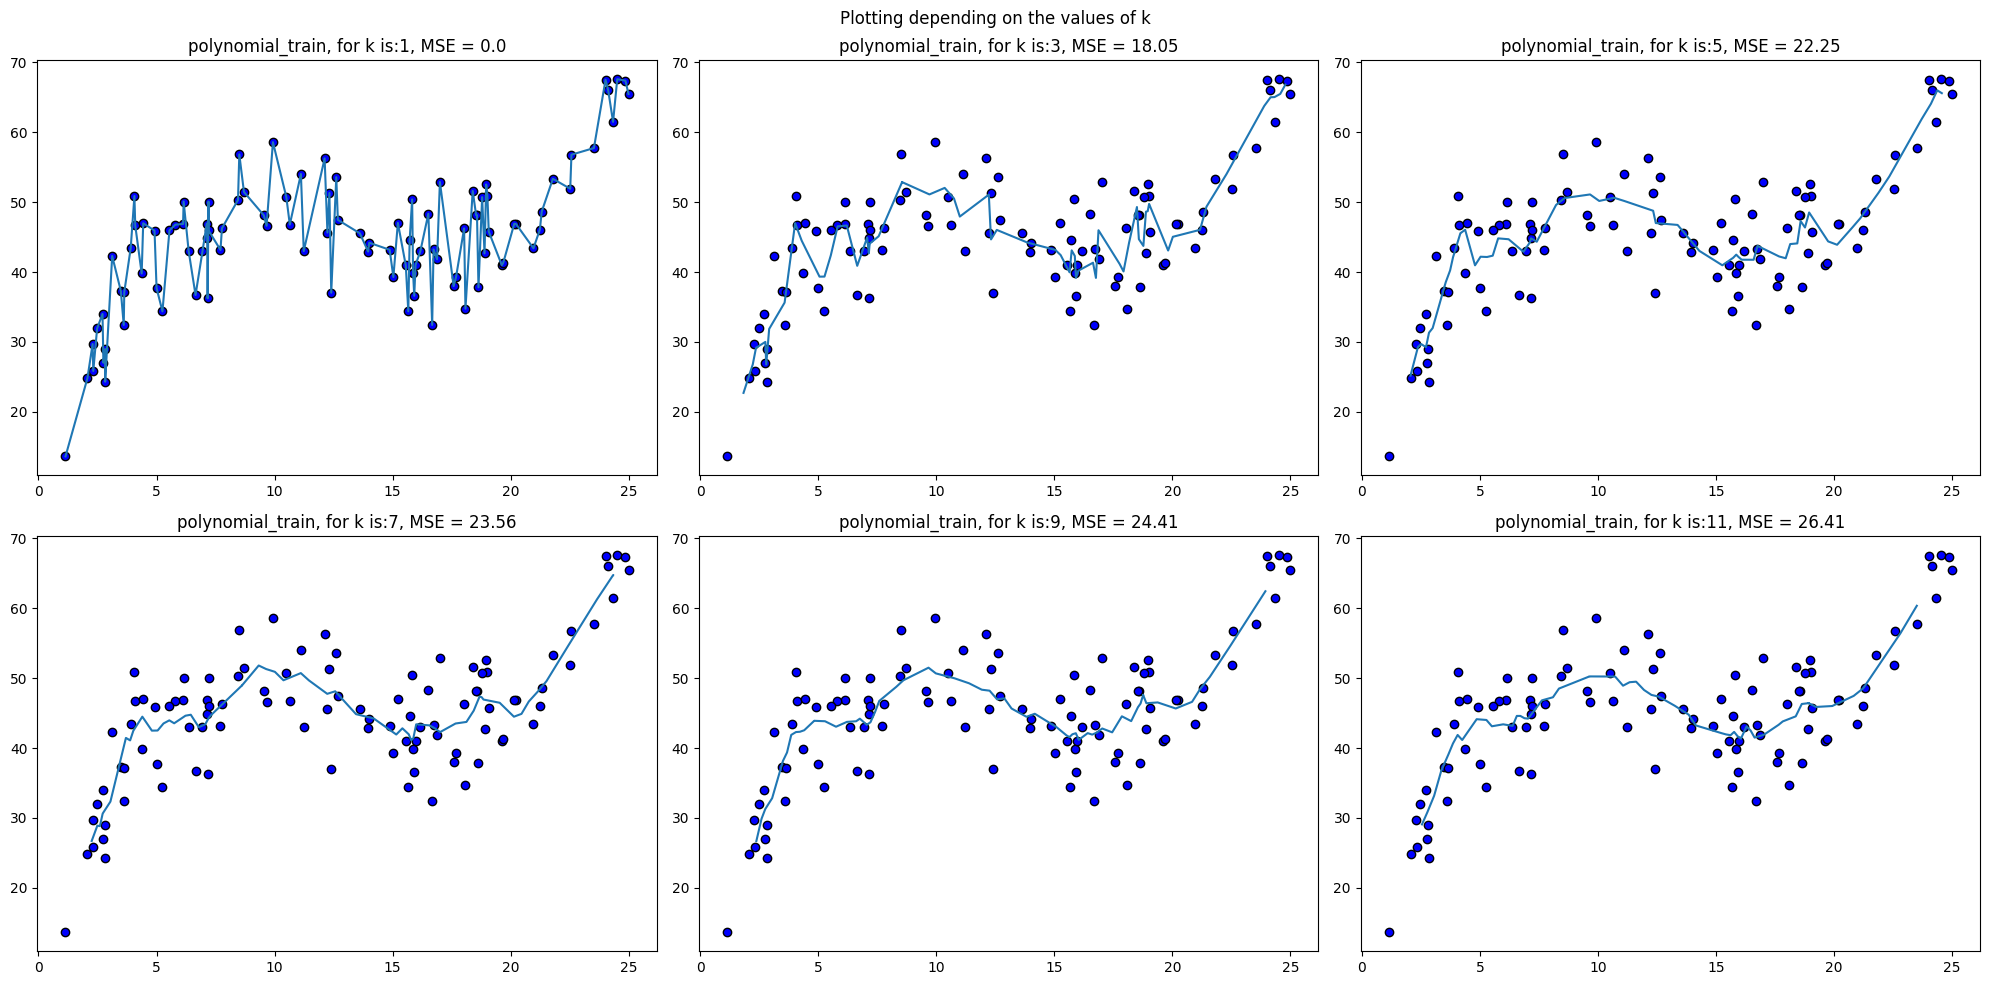

In [36]:
grid_shape = (2, 3)
plt.figure(figsize=(20,10))
plt.suptitle("Plotting depending on the values of k")
for idx, k in enumerate(ks):
    plt.subplot(grid_shape[0], grid_shape[1], idx + 1)
    array = np.argsort(X_train[:,0])
    sorted_array = np.array([[X_train[x,0], X_train[x,1]] for x in array])
    knnregression = np.array([prediction(x, k, X_train) for x in sorted_array])
    knn_array_arg = np.argsort(knnregression[:,0])
    knn_sorted = np.array([[knnregression[x,0], knnregression[x,1]] for x in knn_array_arg])
    squared_diff = (knn_sorted[:,1] - sorted_array[:,1])**2
    mse = np.sum(squared_diff)/len(knn_sorted)
    plt.scatter(X_train[:,0], X_train[:,1], color="blue", edgecolors='k')
    plt.plot(knn_sorted[:,0], knn_sorted[:,1])
    title = 'polynomial_train, for k is:' + str(k) + ', MSE = ' + str(round(mse,2))
    plt.title(title)
plt.tight_layout()
plt.show()

## Question 4
Here we compare with the test data

In [43]:
for idx, k in enumerate(ks):
    array = np.argsort(X_test[:,0])
    sorted_array = np.array([[X_test[x,0], X_test[x,1]] for x in array])
    knnregression = np.array([prediction(x, k, X_train) for x in sorted_array])
    knn_array_arg = np.argsort(knnregression[:,0])
    knn_sorted = np.array([[knnregression[x,0], knnregression[x,1]] for x in knn_array_arg])
    squared_diff = (knn_sorted[:,1] - sorted_array[:,1])**2
    mse = np.sum(squared_diff)/len(knn_sorted)
    print("MSE test error for k=" + str(k) + ' is :' + str(round(mse, 2)))

MSE test error for k=1 is :49.24
MSE test error for k=3 is :31.58
MSE test error for k=5 is :28.48
MSE test error for k=7 is :29.23
MSE test error for k=9 is :27.7
MSE test error for k=11 is :30.36


## Question 5
We observe that the least MSE is for k = 9 and that overall, values of MSE are lower for k betwenn 5 and 9. This means that the predicitions are the most accurate when k is between those values, ideally when k=9.

A lower value of k would mean that the model if overfitting and being too noisy while a higher value of k would mean that the model is underfitting and generalize the results.

K=9 appears to be the perfect tradeoff between those under and overfitting.